<hr style="border-top: 5px solid black;">

<div class="alert alert-block alert-success" style="font-size:20px; border:1px solid black; padding:10px">
<center><h1>Post Goals:</h1></center>
    <hr style="border-top: 2px dashed black;">
    <ol>
        <li><a href="#objective1">Introduction to comparing population means with dependent samples.</a></li><br>
        <li><a href="#objective2">R method to compare the population mean with dependent samples.</a></li><br>
    </ol>
</div>

<hr style="border-top: 5px solid black;">

<div id="objective1" class="alert alert-block alert-warning" style="font-size:16px; border:1px solid black; padding:10px"><center><h1><br><font color="blue">Introduction to comparing population means with dependent samples.</font></h1></center><br>
</div>
<div style="font-size:16px; border:1px solid black; padding:10px">
    <ul><strong><u>The basics</u></strong>
        <li>This test has two populations with the same numeric variable of interest being observed, but the two observation is for the same sampling unit.</li><br>
        <li>The two levels can be thought of as two populations.</li><br>
        <li>The categorical variable is the independent variable.</li><br>
        <li>The numeric variable we are interested in the comparison, is the response variable, and is commonly called the dependent variable.</li><br>
        <li>The big difference with this population mean comparison is that the numeric variables are not independent sampling units, rather, they represent two measurements taken from the same sample</li>
       <li>Example: Comparing the exam score of a student before and after a workshop series. The sampling unit is the student, and there are two of the same numeric measurement for the same student.</li><br>   
        <li>            
            <ul>Data Organization
                <li>each instance or row is a sampling unit</li>
                <li>one column is the response variable from one population (example a time point)</li>
                <li>second column is the response variable from the second population (example a later time point)</li>
                <li>Both columns correspond to the same sampling unit</li>
                <li>the sample mean difference is denoted by 𝑑¯</li>
                <li>the sample mean difference stndard deviation is denoted by $s_d$</li>
            </ul>
        </li><br>
        <li>This test makes inferneces on the difference between the same sampling units population means.</li><br>
        <li>            
            <ul>Assumptions
                <li>Data comes for a random sample</li>
                <li>The two measurements are made one each sampling unit</li>
                <li>The difference in the two populations is normally distributed</li>
            </ul>
        </li><br>
        <li>The R programming language will be used to carry out these calculations.</li><br>
        <li>
            <ul>Hypothesis test:<br>
                <li>Null Hypothesis. $H_o:\ \mu_D = 0 $</li><br>
                <li>Alternative Hypothesis 2 sided: $H_o:\mu_D \neq 0 $</li><br>
                <li>Alternative Hypothesis 1 sided lower tail: $H_o:\ \mu_D < 0 $</li><br>
                <li>Alternative Hypothesis 1 sided upper tail: $H_o:\ \mu_D > 0 $</li><br>
            </ul>                
        </li><br>  
        <li>
            <ul>Hypothesis test values:<br>
                <li>Parameter of interest. $\mu_D$</li><br>
                <li>Point estimate. $\bar{d}$</li><br>
                <li>Standard error under $H_0$: $s_d/\sqrt{n}$</li><br>
                <li>Test statistic. $$t=\frac{\bar d}{s_d/\sqrt{n}}$$</li><br>
                <li>Null distribution: student's t distribution</li><br>
                <li>Degrees of freedom: $$df=n-1$$</li><br>
            </ul>                
        </li><br>
        <li>
            <ul>Confidence intervals:<br><br>
                <li>Calculated as $100(1- \alpha)$</li><br>
                <li>Two-sides: $$\left(\bar d-t_{df,\alpha/2}\widehat{\mathsf{SE}},\bar d+t_{df,\alpha/2}\widehat{\mathsf{SE}}\right)$$</li><br>
                <li>Upper one-sided: $$\left(-\infty, \bar d+t_{df,\alpha}\widehat{\mathsf{SE}}\right)$$</li><br>
                <li>Lower one-sided: $$\left(\bar d-t_{df,\alpha}\widehat{\mathsf{SE}},\infty\right)$$</li><br>
            </ul>                
        </li><br>              
    </ul>
</div>

<hr style="border-top: 5px solid black;">

<div id="objective2" class="alert alert-block alert-warning" style="font-size:16px; border:1px solid black; padding:10px"><center><h1><br><font color="blue">R method to compare the population mean with dependent samples.</font></h1></center><br>
</div>
<div style="font-size:16px; border:1px solid black; padding:10px">
    <ul><strong><u>The code</u></strong>
        <li><code>t.test(before, after, paired=TRUE, alt=TYPE, conf.level=CL)</code></li><br>
        <li>Example: cholesterol measurements are obtained from patients before and after a treatment.</li><br>
         <li>Did the treatment reduce the cholesterol.</li><br>
    </ul>
</div>

## Load and inspect data

In [1]:
cholesterol <- read.csv("data/cholesterol.paired.csv")
attach(cholesterol)
str(cholesterol)

'data.frame':	15 obs. of  3 variables:
 $ subj  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ before: int  265 240 258 295 251 245 287 314 260 279 ...
 $ after : int  258 234 245 286 239 235 280 301 248 268 ...


In [2]:
#view data
cholesterol

subj,before,after
<int>,<int>,<int>
1,265,258
2,240,234
3,258,245
4,295,286
5,251,239
6,245,235
7,287,280
8,314,301
9,260,248


## Calculate parameters, test statistic, and p-values

In [3]:
diff <- before-after
dbar <- mean(diff); dbar
s.d <- sd(diff); s.d
n <- length(diff); n
df <- n -1; df
t.crit <- qt(0.05, df, lower.tail=FALSE); t.crit
t.stat <- dbar/(s.d/sqrt(n)); t.stat
p.value <- pt(t.stat, df, lower.tail=FALSE); p.value

[1] 10.26667

[1] 3.614784

[1] 15

[1] 14

[1] 1.76131

[1] 11

[1] 1.416898e-08

# Confirm the difference in the data is normally distributed

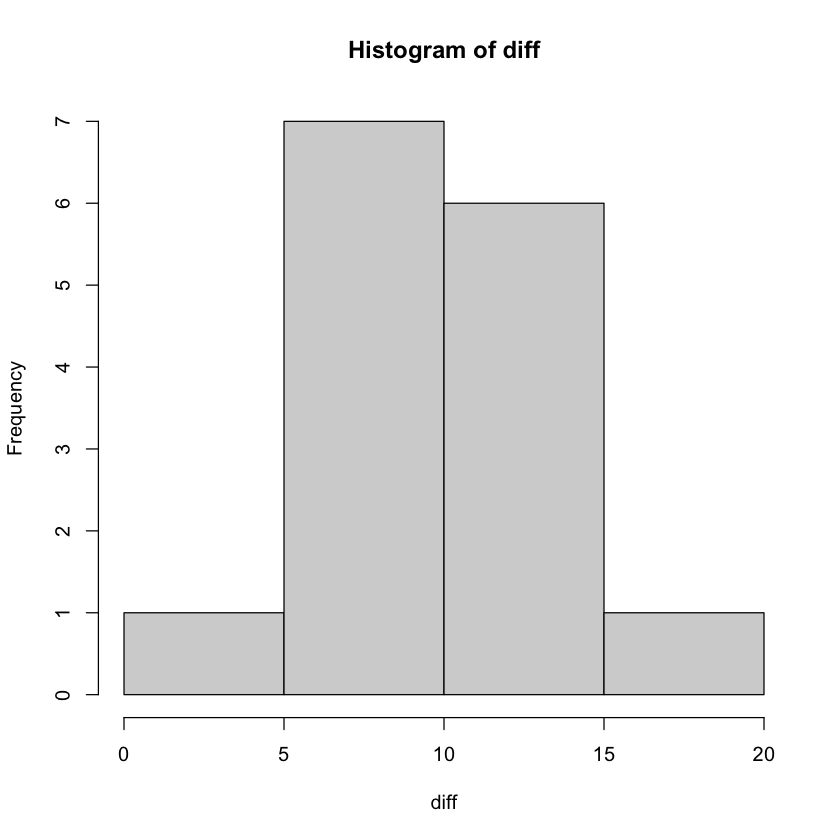

In [4]:
hist(diff)

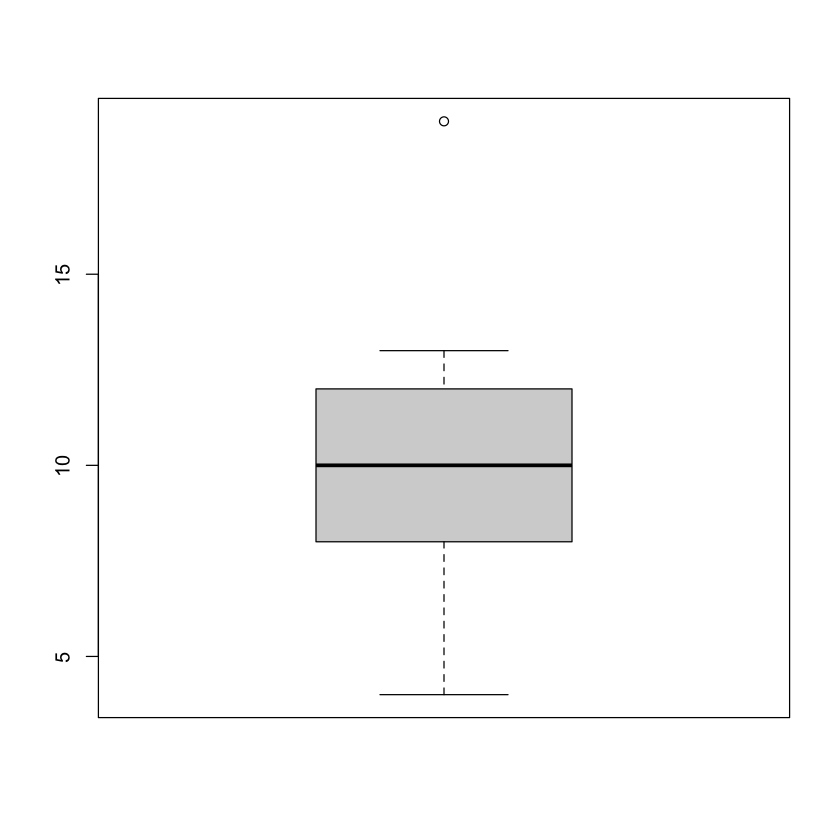

In [5]:
boxplot(diff)

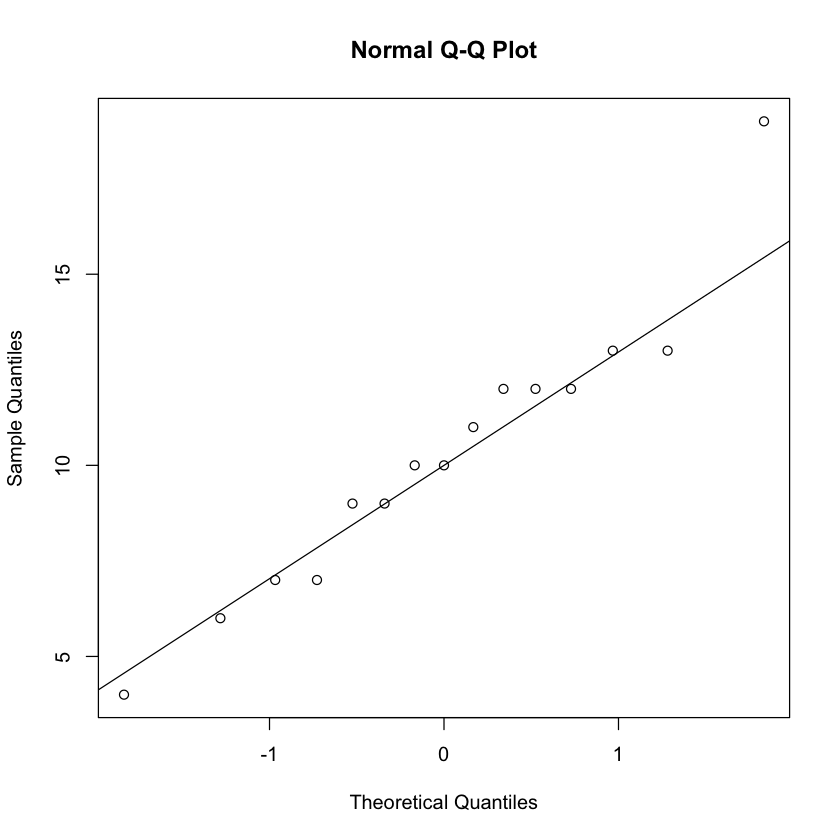

In [6]:
qqnorm(diff); qqline(diff)

## Manual Example Result<br>  <font color="red"> Reject $H_0$</font> <br>The difference between the two dependent sample populations appear normally distributed and the p value is less than the alpha level, there is a difference between samples.

<hr style="border-top: 5px solid black;">

# Use R method <code>t.test(before, after, paired=TRUE, alt='g')</code>

In [7]:
t.test(cholesterol$before, cholesterol$after, paired=TRUE, alt='g')


	Paired t-test

data:  cholesterol$before and cholesterol$after
t = 11, df = 14, p-value = 1.417e-08
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 8.622777      Inf
sample estimates:
mean of the differences 
               10.26667 


## R Programming Example Result<br>  <font color="red"> Reject $H_0$</font> <br>The p value is less than the alpha level, there is a difference between samples and the confidence interval at 95% is (8.6228, infinity).

<hr style="border-top: 5px solid black;">